LAB 04<br>
gr.220A<br>
pp53828<br>
Piotr Pietrusewicz<br>

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
from skimage import data
from skimage import filters
from skimage import exposure
from PIL import Image
import matplotlib.image

# 2 Dyskretyzacja

# 2.1

In [53]:
def sin(f = 1, T = 1, Fs = 128):
    dt = 1.0 / Fs
    t = np.arange(0, T, dt)
    s = np.sin(2 * np.pi * f * t)
    return t,s

# 2.2

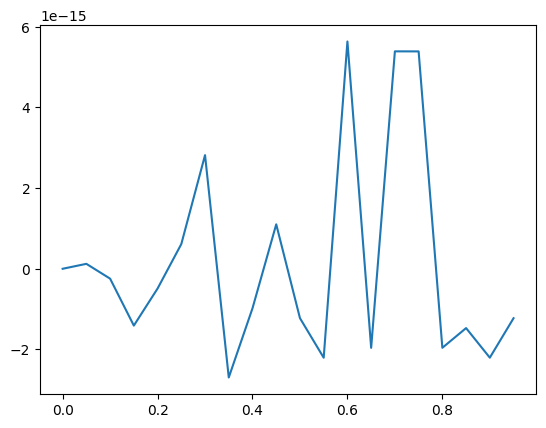

In [54]:
(t, s) = sin(f = 10, Fs = 20)

plt.plot(t, s)
plt.show()

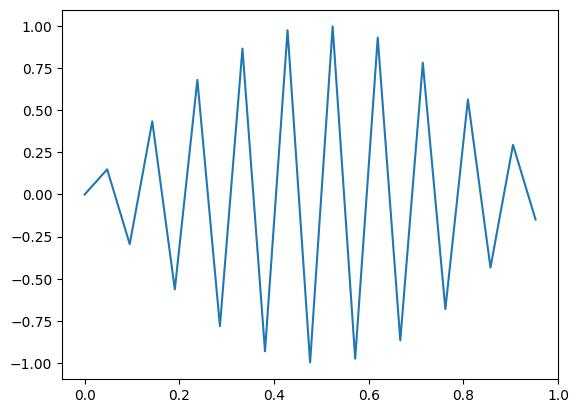

In [55]:
(t, s) = sin(f = 10, Fs = 21)

plt.plot(t, s)
plt.show()

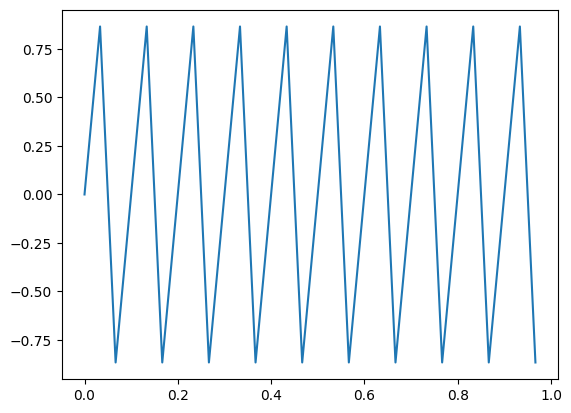

In [56]:
(t, s) = sin(f = 10, Fs = 30)

plt.plot(t, s)
plt.show()

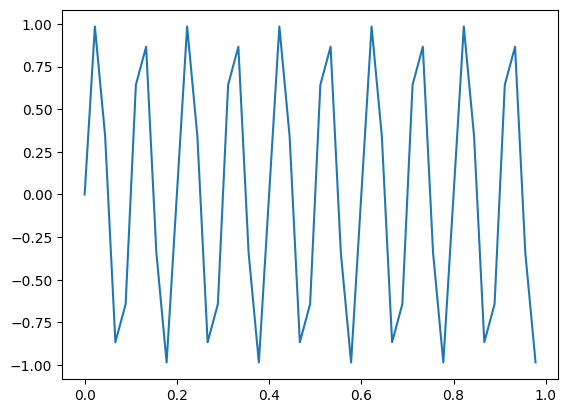

In [57]:
(t, s) = sin(f = 10, Fs = 45)

plt.plot(t, s)
plt.show()

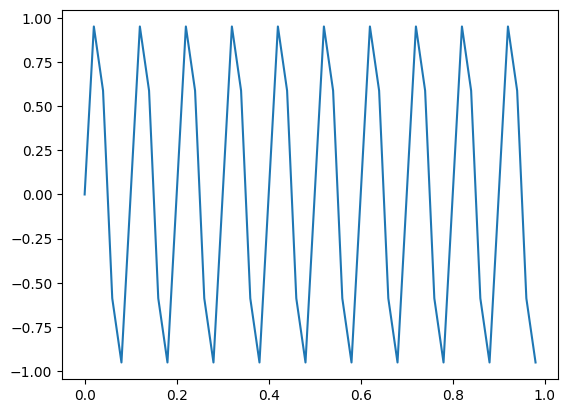

In [58]:
(t, s) = sin(f = 10, Fs = 50)

plt.plot(t, s)
plt.show()

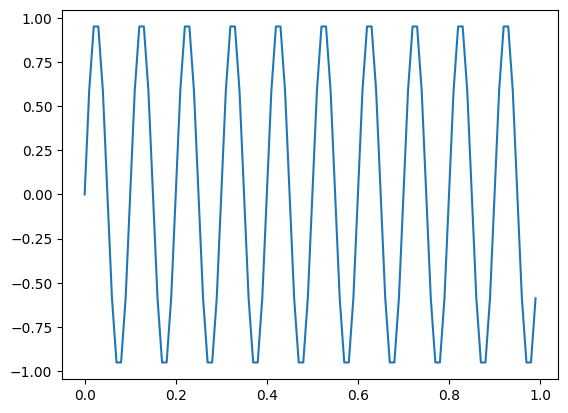

In [59]:
(t, s) = sin(f = 10, Fs = 100)

plt.plot(t, s)
plt.show()

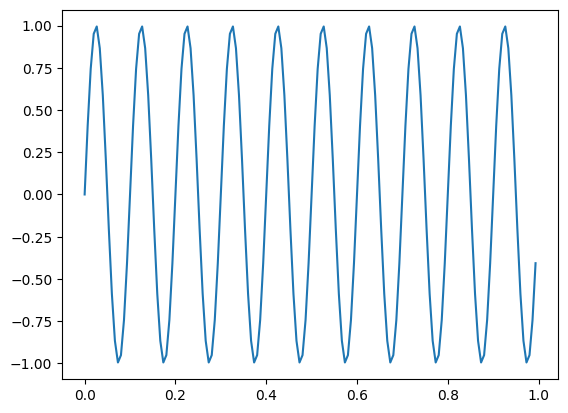

In [60]:
(t, s) = sin(f = 10, Fs = 150)

plt.plot(t, s)
plt.show()

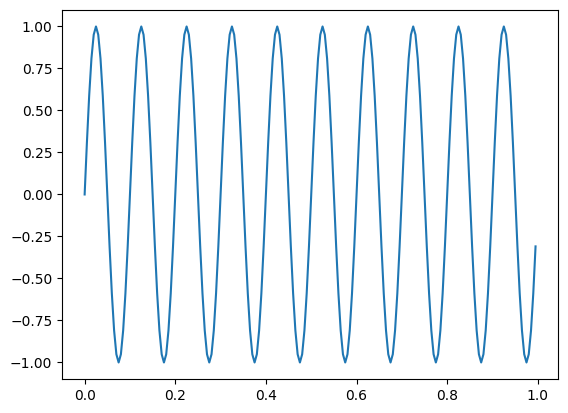

In [61]:
(t, s) = sin(f = 10, Fs = 200)

plt.plot(t, s)
plt.show()

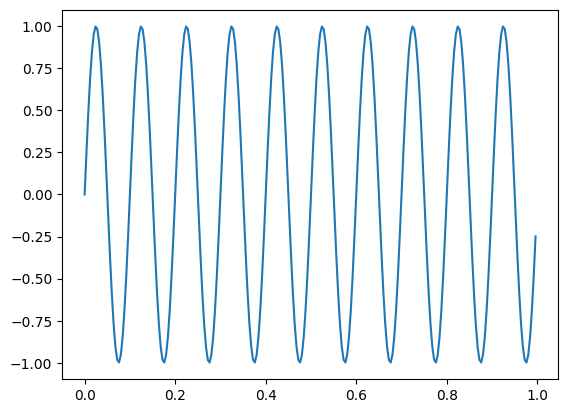

In [62]:
(t, s) = sin(f = 10, Fs = 250)

plt.plot(t, s)
plt.show()

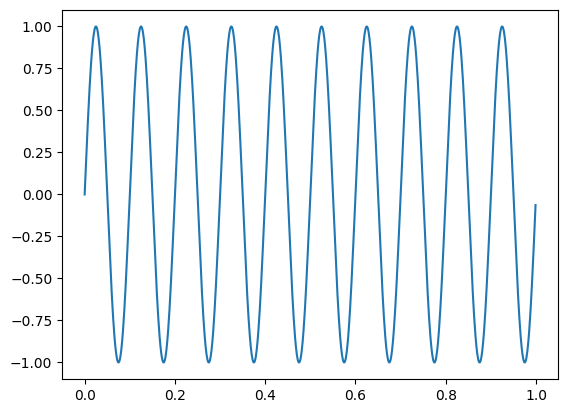

In [63]:
(t, s) = sin(f = 10, Fs = 1000)

plt.plot(t, s)
plt.show()

# 2.4

Czy istnieje twierdzenie, które określa z jaką częstotliwością należy
próbkować, aby móc wiernie odtworzyć sygnał? Jak się nazywa? <br><br>
Istnieje i nazywa się twierdzeniem Nyquista–Shannona

# 2.5

Jak nazywa się zjawisko, które z powodu błędnie dobranej częstotliwości próbkowania powoduje błędną interpretację sygnału? <br><br>
Nazywa się ono aliasingiem

# Kwantyzacja

# 3.1

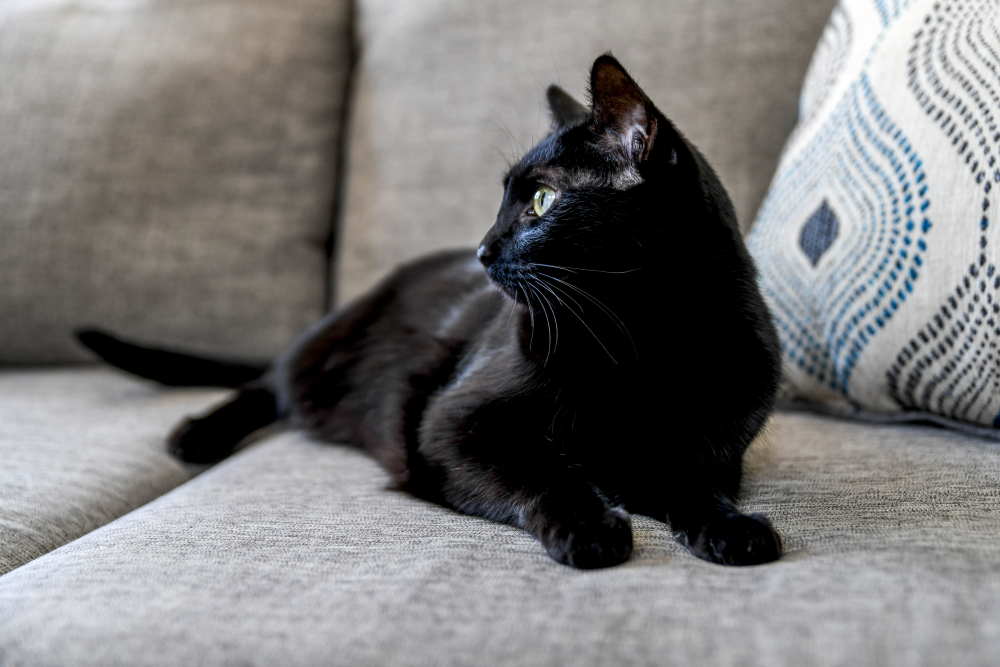

In [64]:
image = Image.open("lab04_zdjecie.png")

display(image)

# 3.2

In [65]:
image_array = np.array(image)

dimensions = image_array.shape

print("Liczba wymiarów macierzy obrazu:", len(dimensions))

Liczba wymiarów macierzy obrazu: 3


# 3.3

In [66]:
depth = dimensions[-1]

print("Liczba wartości opisujących pojedynczy piksel:", depth)

Liczba wartości opisujących pojedynczy piksel: 4


# 3.4

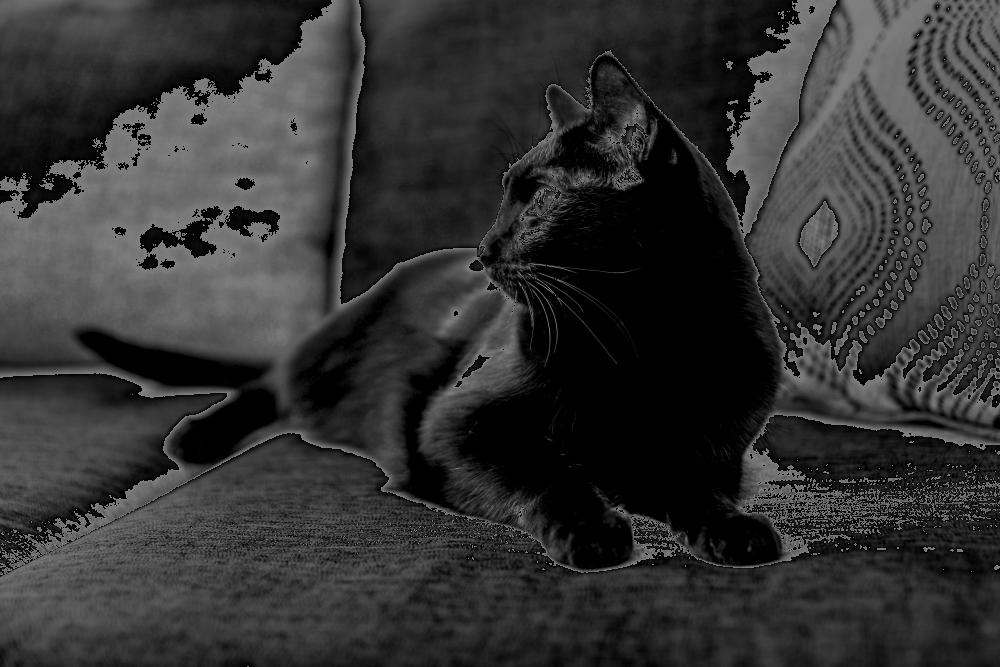

In [67]:
R = image_array[:,:,0]
G = image_array[:,:,1]
B = image_array[:,:,2]

pixel_brightness_method = (np.maximum(R, G, B) + np.maximum(R, G, B)) / 2

display(Image.fromarray(pixel_brightness_method.astype(np.uint8)))

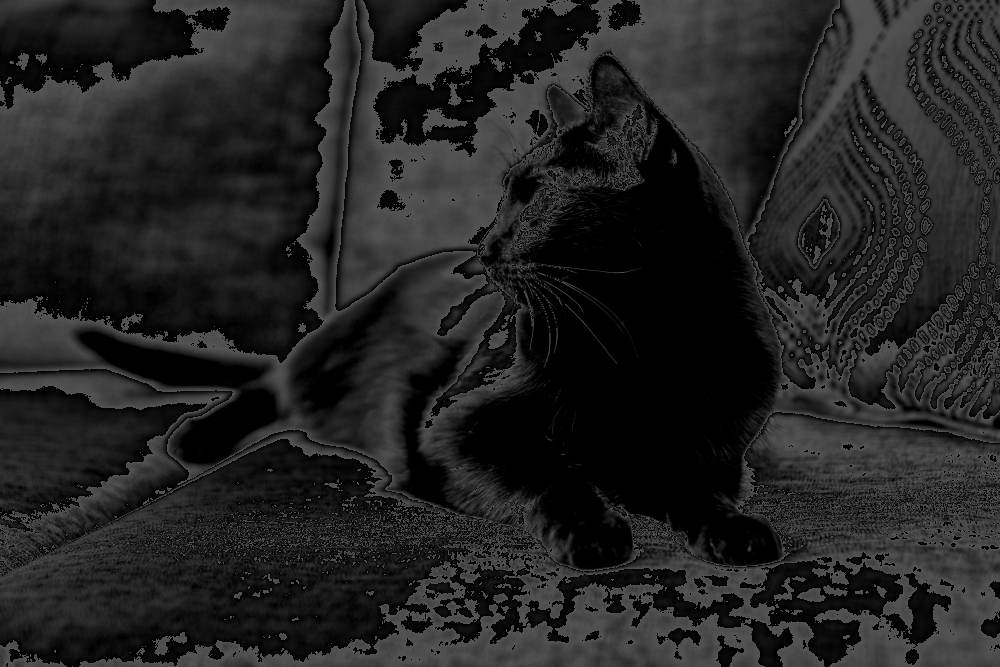

In [68]:
pixel_average_method = (R + G + B) / 3

display(Image.fromarray(pixel_average_method.astype(np.uint8)))

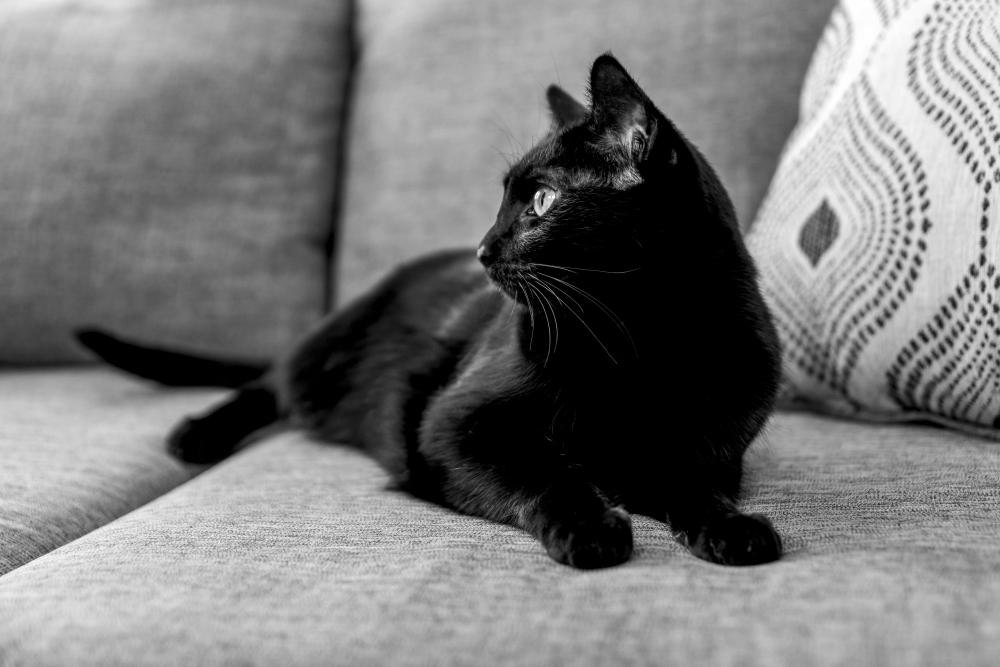

In [69]:
pixel_lumination_method = 0.21 * R + 0.72 * G + 0.07 * B

display(Image.fromarray(pixel_lumination_method.astype(np.uint8)))

# 3.5

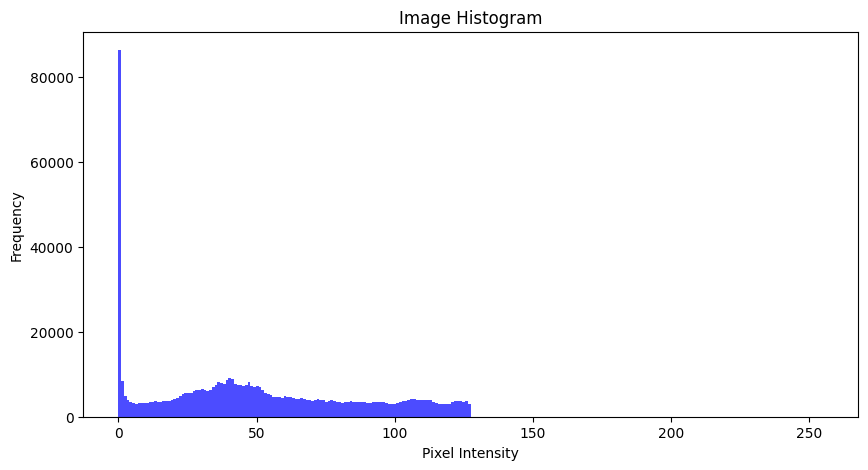

In [70]:
flat_pixel_brightness_method = pixel_brightness_method.ravel()
histogram, bins = np.histogram(flat_pixel_brightness_method, bins=256, range=(0, 255))

plt.figure(figsize=(10, 5))
plt.hist(flat_pixel_brightness_method, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

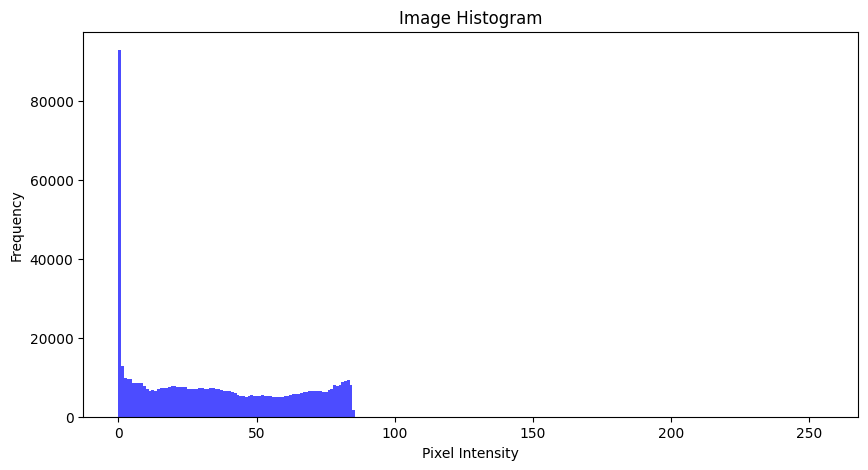

In [71]:
flat_pixel_average_method = pixel_average_method.ravel()
histogram, bins = np.histogram(flat_pixel_average_method, bins=256, range=(0, 255))

plt.figure(figsize=(10, 5))
plt.hist(flat_pixel_average_method, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

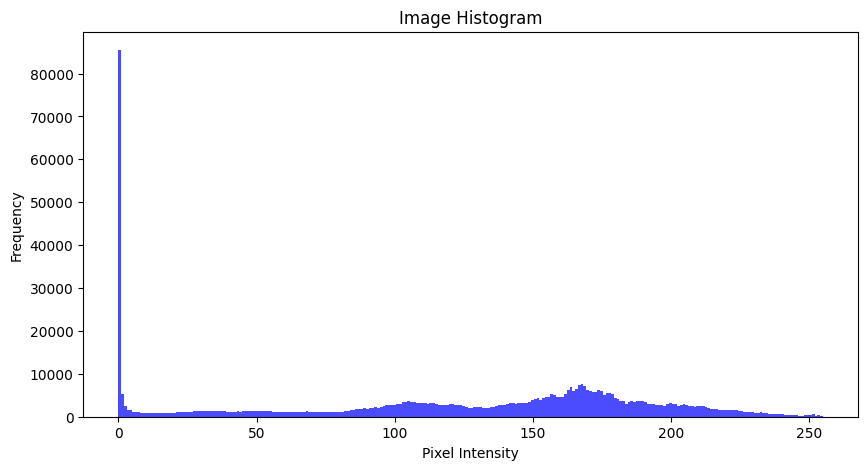

In [72]:
flat_pixel_lumination_method = pixel_lumination_method.ravel()
histogram, bins = np.histogram(flat_pixel_lumination_method, bins=256, range=(0, 255))

plt.figure(figsize=(10, 5))
plt.hist(flat_pixel_lumination_method, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

# 3.6

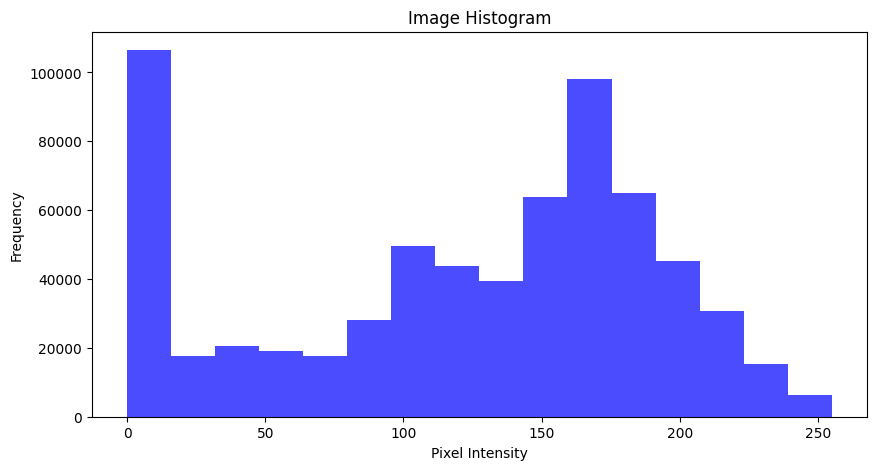

Zakresy nowych kolorów:
Bin 1: 0.0 - 15.9375
Bin 2: 15.9375 - 31.875
Bin 3: 31.875 - 47.8125
Bin 4: 47.8125 - 63.75
Bin 5: 63.75 - 79.6875
Bin 6: 79.6875 - 95.625
Bin 7: 95.625 - 111.5625
Bin 8: 111.5625 - 127.5
Bin 9: 127.5 - 143.4375
Bin 10: 143.4375 - 159.375
Bin 11: 159.375 - 175.3125
Bin 12: 175.3125 - 191.25
Bin 13: 191.25 - 207.1875
Bin 14: 207.1875 - 223.125
Bin 15: 223.125 - 239.0625
Bin 16: 239.0625 - 255.0


In [73]:
histogram, bins = np.histogram(flat_pixel_lumination_method, bins=16, range=(0, 255))

plt.figure(figsize=(10, 5))
plt.hist(flat_pixel_lumination_method, bins=16, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

print("Zakresy nowych kolorów:")
for i in range(len(bins) - 1):
    print(f"Bin {i+1}: {bins[i]} - {bins[i+1]}")

# 3.7

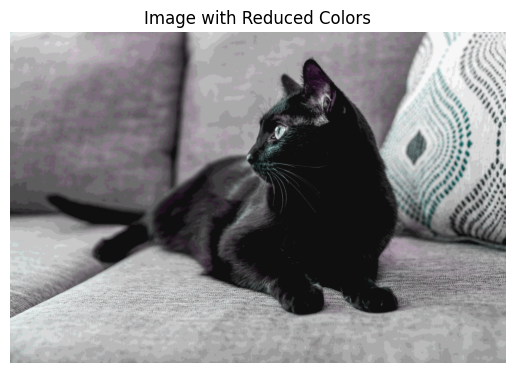

In [74]:
flat_image_array = image_array.ravel()

histogram, bins = np.histogram(flat_image_array, bins=16, range=(0, 255))

midpoints = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins) - 1)]

reduced_image_array = np.digitize(image_array, bins) - 1
reduced_image_array = np.clip(reduced_image_array, 0, 15)
reduced_image_array = np.array(midpoints)[reduced_image_array]

reduced_image = Image.fromarray(reduced_image_array.astype(np.uint8))

plt.imshow(reduced_image)
plt.axis('off')
plt.title('Image with Reduced Colors')
plt.show()

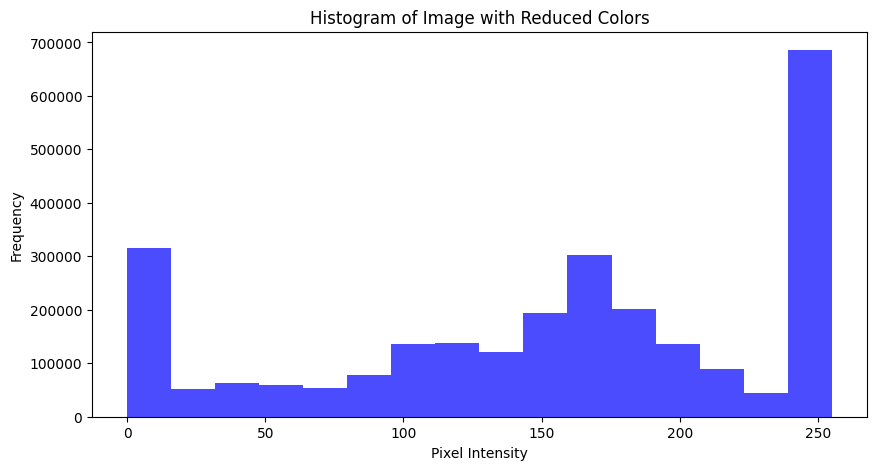

In [75]:
reduced_flat_image_array = reduced_image_array.ravel()
reduced_histogram, reduced_bins = np.histogram(reduced_flat_image_array, bins=16, range=(0, 255))

plt.figure(figsize=(10, 5))
plt.hist(reduced_flat_image_array, bins=16, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image with Reduced Colors')
plt.show()

# Binaryzacja

# 4.2

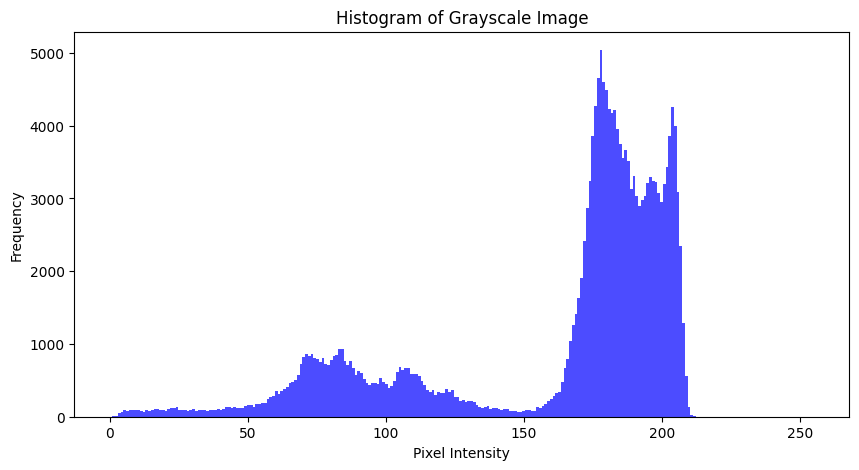

In [76]:
image = Image.open("lab04_zdjecie2.png")

image_array = np.array(image)

R = image_array[:,:,0]
G = image_array[:,:,1]
B = image_array[:,:,2]

image_array = 0.21 * R + 0.72 * G + 0.07 * B

flat_image_array = image_array.ravel()

histogram, bins = np.histogram(flat_image_array, bins=256, range=(0, 255))

plt.figure(figsize=(10, 5))
plt.hist(flat_image_array, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show()


# 4.3

In [77]:
def find_threshold(hist):
    smoothed_hist = np.convolve(hist, np.ones(3)/3, mode='valid')
    
    minima_indices = np.where((smoothed_hist[:-2] > smoothed_hist[1:-1]) & (smoothed_hist[1:-1] < smoothed_hist[2:]))[0] + 1
    
    if len(minima_indices) > 0:
        threshold_index = minima_indices[0]
        threshold = threshold_index
    else:
        threshold = len(hist) // 2
    
    return threshold

threshold = find_threshold(histogram)
print("Threshold value:", threshold)

Threshold value: 6


# 4.4

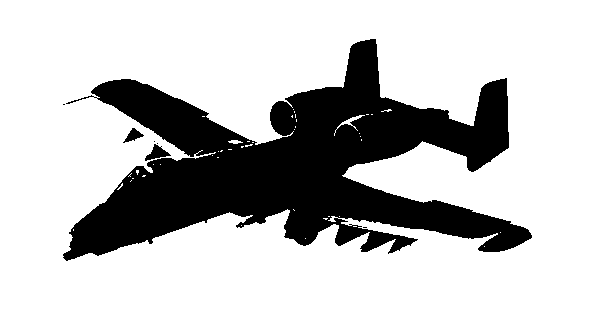

In [78]:
camera = np.array(image_array)

val = filters.threshold_otsu(camera)

def binarize_image(image_array, threshold):
    binary_image_array = np.where(image_array > threshold, 1, 0)
    return binary_image_array

binary_image_array = binarize_image(image_array, val)

binary_image = Image.fromarray(binary_image_array.astype(np.uint8) * 255)
display(binary_image)